## Linear regression model with Mosquito Indicator Data  

data from: https://www.kaggle.com/datasets/kukuroo3/mosquito-indicator-in-seoul-korea



## Data summary

In [2]:
import pandas as pd
df = pd.read_csv("mosquito.csv")
df.columns = ['date', 'mosquito_indi', 'rain_mm', 'mean_t', 'min_t', 'max_t']
df.head()


,date,mosquito_indi,rain_mm,mean_t,min_t,max_t
0,2016-05-01,254.4,0.0,18.8,12.2,26.0
1,2016-05-02,273.5,16.5,21.1,16.5,28.4
2,2016-05-03,304.0,27.0,12.9,8.9,17.6
3,2016-05-04,256.2,0.0,15.7,10.2,20.6
4,2016-05-05,243.8,7.5,18.9,10.2,26.9


In [106]:
## see null data  
df.isnull().sum()

date             0
mosquito_indi    0
rain_mm          0
mean_t           0
min_t            0
max_t            0
dtype: int64

In [107]:
df.describe()

,mosquito_indi,rain_mm,mean_t,min_t,max_t
count,1342.000000,1342.000000,1342.000000,1342.000000,1342.000000
mean,251.991803,3.539866,14.166021,10.005663,19.096870
std,295.871336,13.868106,10.943990,11.109489,11.063394
min,0.000000,0.000000,-14.800000,-17.800000,-10.700000
25%,5.500000,0.000000,4.500000,0.300000,9.300000
50%,91.900000,0.000000,16.500000,11.500000,21.900000
75%,480.400000,0.400000,23.300000,19.500000,28.175000
max,1000.000000,144.500000,33.700000,30.300000,39.600000


In [108]:
# We are goint to extract month and year from the date column 
df['year'] = pd.to_datetime(df['date']).dt.strftime('%Y')
df['month'] = pd.to_datetime(df['date']).dt.strftime('%m')
df= df.drop(['date'], axis=1)
df


,mosquito_indi,rain_mm,mean_t,min_t,max_t,year,month
0,254.4,0.0,18.8,12.2,26.0,2016,05
1,273.5,16.5,21.1,16.5,28.4,2016,05
2,304.0,27.0,12.9,8.9,17.6,2016,05
3,256.2,0.0,15.7,10.2,20.6,2016,05
4,243.8,7.5,18.9,10.2,26.9,2016,05
...,...,...,...,...,...,...,...
1337,5.5,0.0,-1.7,-4.6,2.6,2019,12
1338,5.5,0.0,1.1,-3.6,6.1,2019,12
1339,5.5,1.4,3.8,1.1,6.2,2019,12
1340,5.5,0.4,2.7,-5.7,6.8,2019,12


Replace numerical momths to categories 

In [109]:
labels= [f'{i:>02}' for i in range(1, 13)]
df_clean=(df
    .assign(
    month=lambda df: df.month.replace(labels, ['January', 'February', 'March', 'April', 'May', 'June', 'July',
                                                                    'August', 'September', 'October', 'November',  'December'])
    ))
df_clean.head()

,mosquito_indi,rain_mm,mean_t,min_t,max_t,year,month
0,254.4,0.0,18.8,12.2,26.0,2016,May
1,273.5,16.5,21.1,16.5,28.4,2016,May
2,304.0,27.0,12.9,8.9,17.6,2016,May
3,256.2,0.0,15.7,10.2,20.6,2016,May
4,243.8,7.5,18.9,10.2,26.9,2016,May


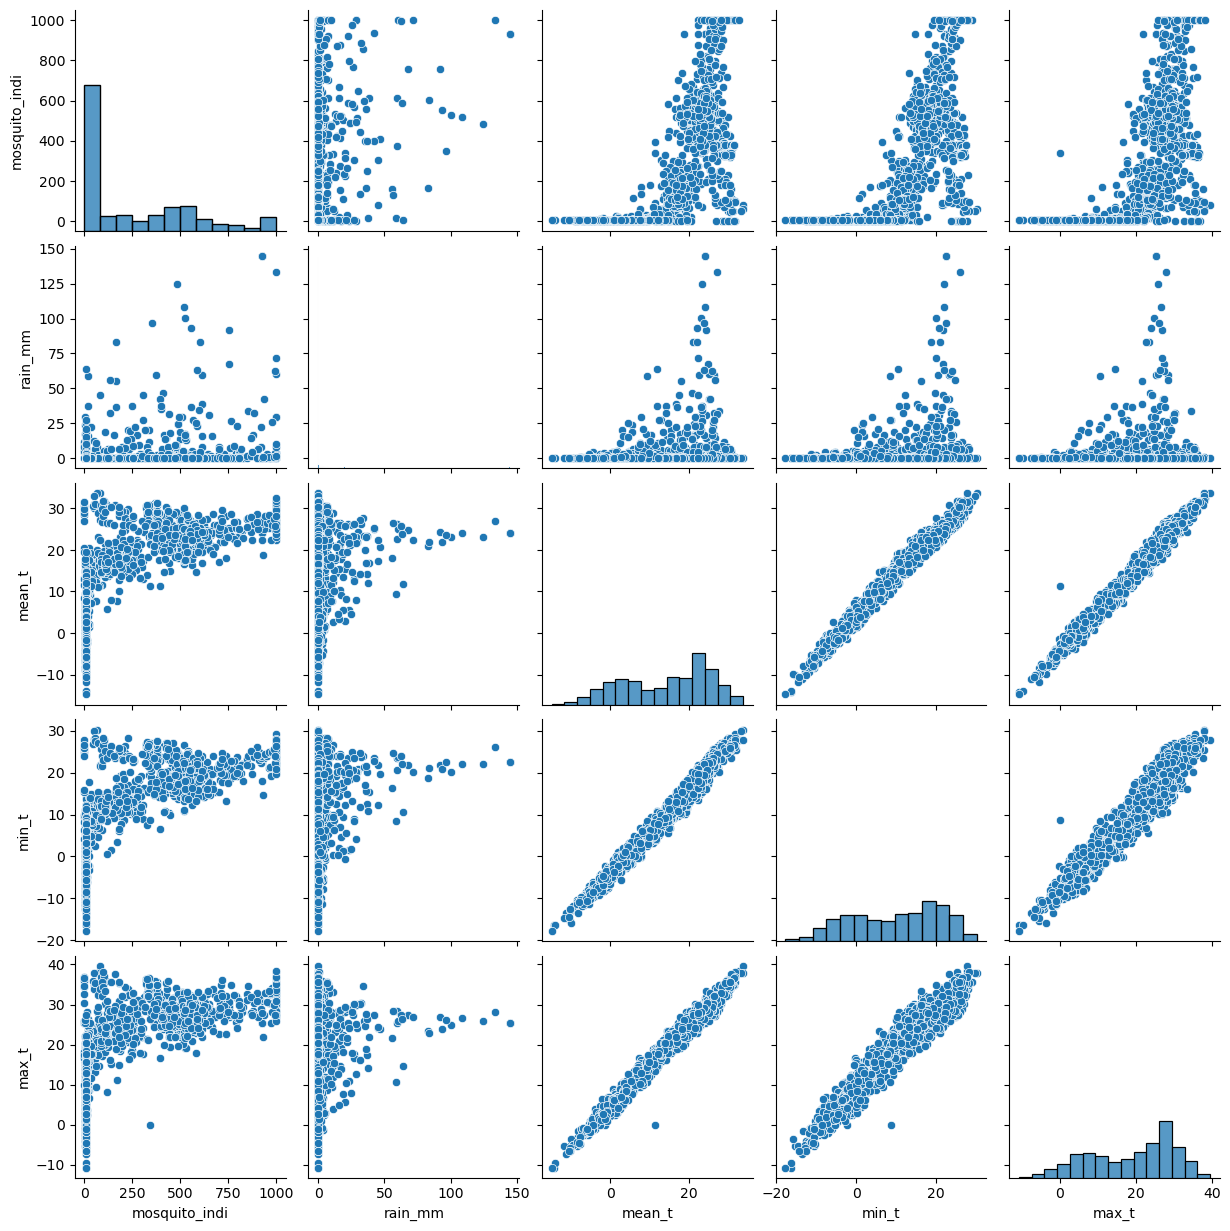

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_clean, height=2.5)
plt.show()

/tmp/ipykernel_6083/2222258499.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr(),


<Axes: >

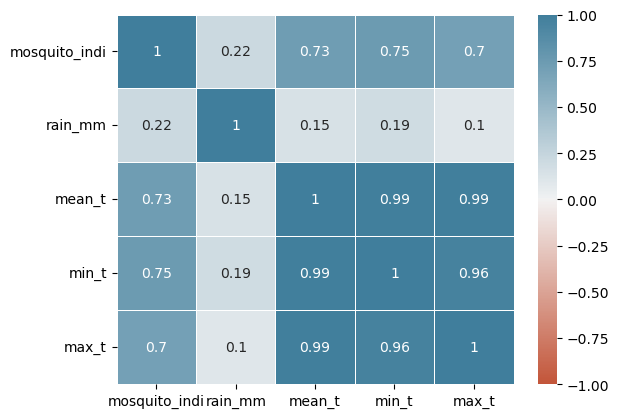

In [7]:
sns.heatmap(
    data=df.corr(),
    cmap= sns.diverging_palette(20,230, as_cmap=True), 
    center=0,
    vmin=-1, 
    vmax=1,
    linewidths=0.5, 
    annot=True)

we will discard min_t and max_t because they are highly correlated with mean_t, so they would give redundant information

In [110]:
df_clean= df_clean.drop(['min_t','max_t'], axis=1)

In [111]:
df_clean

,mosquito_indi,rain_mm,mean_t,year,month
0,254.4,0.0,18.8,2016,May
1,273.5,16.5,21.1,2016,May
2,304.0,27.0,12.9,2016,May
3,256.2,0.0,15.7,2016,May
4,243.8,7.5,18.9,2016,May
...,...,...,...,...,...
1337,5.5,0.0,-1.7,2019,December
1338,5.5,0.0,1.1,2019,December
1339,5.5,1.4,3.8,2019,December
1340,5.5,0.4,2.7,2019,December


In [112]:
df_clean.groupby('year').count()

,mosquito_indi,rain_mm,mean_t,month
year,,,,
2016,242,242,242,242
2017,388,388,388,388
2018,351,351,351,351
2019,361,361,361,361


## OneHoteEncoder transformation 

In [124]:
df_transformed = pd.get_dummies(df_clean, columns=['month','year']) 


In [125]:
df_transformed

,mosquito_indi,rain_mm,mean_t,month_April,month_August,month_December,month_February,month_January,month_July,month_June,month_March,month_May,month_November,month_October,month_September,year_2016,year_2017,year_2018,year_2019
0,254.4,0.0,18.8,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
1,273.5,16.5,21.1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,304.0,27.0,12.9,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,256.2,0.0,15.7,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
4,243.8,7.5,18.9,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,5.5,0.0,-1.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1338,5.5,0.0,1.1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1339,5.5,1.4,3.8,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1340,5.5,0.4,2.7,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


## Data scaling and Lienal regression

## MODEL 1

In [126]:
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split  

In [127]:
X_cols = list(set(df_transformed.columns)-set(['mosquito_indi']))
y_col = ['mosquito_indi']  

X = df_transformed[X_cols].values 
y = df_transformed[y_col].values 

X_train, X_test, y_train, y_test = train_test_split(X,y)  
sc_x = StandardScaler().fit(X)    
sc_y = StandardScaler().fit(y) 

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression()
model.fit(X_train,y_train)


y_pred = model.predict(X_test) 

In [128]:
y_pred.shape

(336, 1)

# MSE and R2 of model 1

In [129]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8398
mse:  0.1813


# STATS  of model 1

In [130]:
from regressors import stats
model.intercept_ = model.intercept_[0] 
model.coef_ = model.coef_.reshape(-1)

In [131]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.7034 -0.1207  0.0175 0.1552 1.2048


Coefficients:
                     Estimate                   Std. Error                     t value   p value
_intercept      -1.002500e-02   0.0240280000+0.0000000000j -4.172000e-01+0.000000e+00j  0.676797
rain_mm          4.388900e-02   0.0277080000+0.0000000000j  1.584000e+00-0.000000e+00j  0.114148
month_August     1.683674e+12   5960.878815+136111.238639j  5.406898e+05-1.234616e+07j  0.000000
year_2017        2.179185e+12  342454.187126+21266.053971j  6.338991e+06-3.936449e+05j  0.000000
month_April      1.449042e+12   4415.259008+100818.500377j  6.282387e+05-1.434527e+07j  0.000000
month_November   1.542098e+12   5000.552262+114183.125334j  5.903287e+05-1.347963e+07j  0.000000
year_2016        1.848026e+12  246280.735725+15293.780844j  7.474913e+06-4.641844e+05j  0.000000
month_December   1.719354e+12   6216.193126+141941.318054j  5.294685e+05-1.208995e+07j  0.000

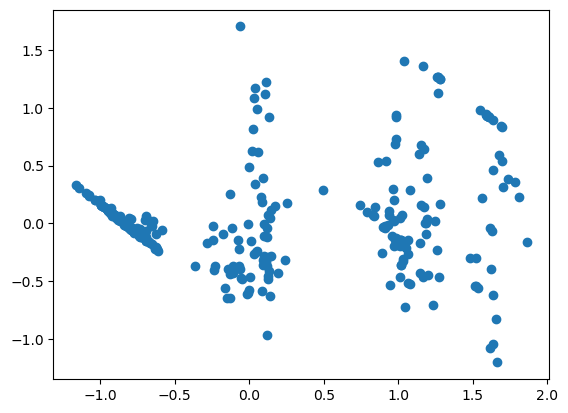

In [132]:
import numpy as np
residuals = np.subtract(y_test, y_pred.reshape(-1)) 
plt.scatter(y_pred, residuals)
plt.show()

# model 2
 In this case we exclude years  


In [151]:
X_cols = list(set(df_transformed.columns)-set(['mosquito_indi','year_2016','year_2017', 'year_2018','year_2019'])) 
y_col = ['mosquito_indi'] 
X = df_transformed[X_cols].values 
y = df_transformed[y_col].values 

X_train, X_test, y_train, y_test = train_test_split(X,y)  
sc_x = StandardScaler().fit(X)   
sc_y = StandardScaler().fit(y)  


X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)

 
y_pred = model.predict(X_test) 

# MSE and R2

In [152]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.8043
mse:  0.1993


# STATS with regressor

In [153]:
#model.intercept_ = model.intercept_[0] 
model.coef_ = model.coef_.reshape(-1)

In [154]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.7714 -0.0985  0.0118 0.1506 1.2991


Coefficients:
                     Estimate               Std. Error                     t value   p value
_intercept       0.000000e+00   0.02491500+0.00000000j  0.000000e+00+0.000000e+00j  1.000000
rain_mm          3.321200e-02   0.03537500+0.00000000j  9.389000e-01-0.000000e+00j  0.348474
month_August     4.234880e+12  557114.203027+0.000000j  7.601458e+06-0.000000e+00j  0.000000
month_April      3.644720e+12  412658.201528-0.000000j  8.832299e+06+0.000000e+00j  0.000000
month_March      3.737110e+12  433844.109597-0.000000j  8.613946e+06+0.000000e+00j  0.000000
month_November   3.878779e+12  467360.681582-0.000000j  8.299327e+06+0.000000e+00j  0.000000
month_July       4.265116e+12  565097.826328+0.000000j  7.547570e+06-0.000000e+00j  0.000000
month_February   3.663449e+12  416910.024688-0.000000j  8.787146e+06+0.000000e+00j  0.000000
month_May        4.219639e+12  5

In [155]:
y__predict_inverse=sc_y.inverse_transform(y_pred)
M_predicion= pd.DataFrame(y__predict_inverse)
M_predicion.rename(columns={0: "Mosquito_prediccion"}, inplace=True)
lol= pd.DataFrame(sc_y.inverse_transform(y_test.reshape(-1, 1)))
lol.rename(columns={0: "Mosquito_indi"}, inplace=True)

data_compare_predict= pd.concat([lol, M_predicion], axis=1)
data_compare_predict.tail()



,Mosquito_indi,Mosquito_prediccion
331,560.8,250.186621
332,349.7,283.329769
333,508.6,551.940907
334,5.5,9.014256
335,464.1,583.351080


### Comparing probability density function of predicted and actual values   

<Axes: ylabel='Proportion'>

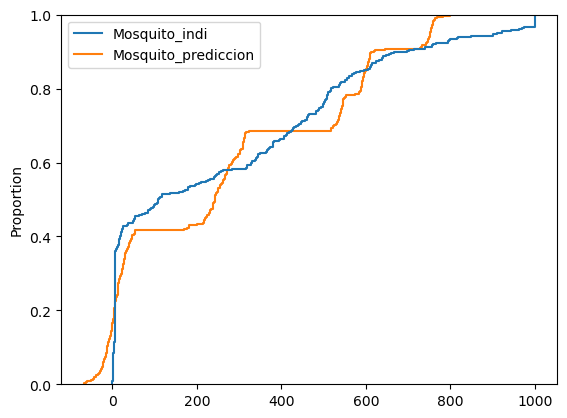

In [156]:
sns.ecdfplot(
    data=data_compare_predict)

In [162]:
import session_info
session_info.show()